<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Discretización por Kmeans </font> </center>

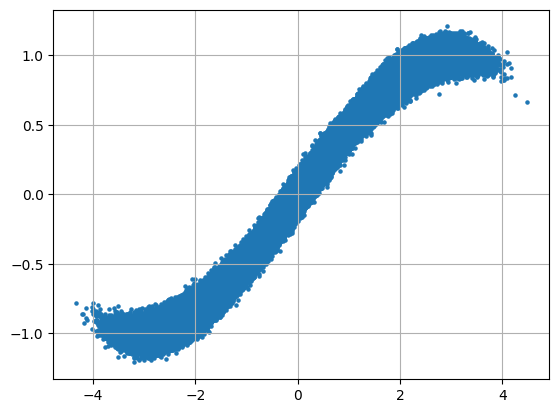

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df=pd.read_csv('dataKmeans.csv')
plt.scatter(df.x,df.y,s=5)
plt.grid()

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

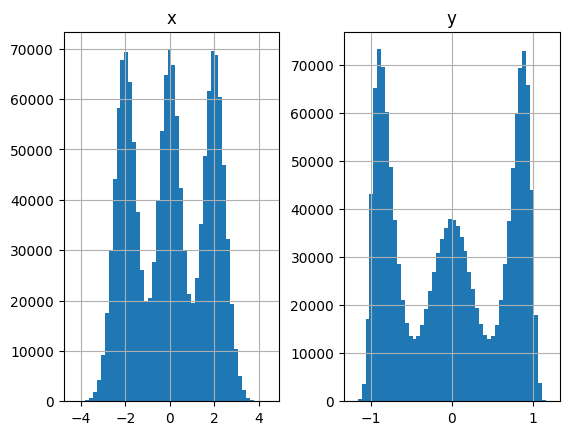

In [3]:
df.hist(bins=50)

In [4]:
#@title Discretización con K-means
#
# Centroides
k=3
ctr=np.random.uniform(df.x.min(),df.x.max(),k)
ctr

array([-0.20066164,  3.79446281, -1.29241526])

In [6]:
dif=[]
for c_i in ctr:
    dif.append(np.abs(c_i-df[['x']].values))
distancias=np.concatenate(dif,axis=1)
grupos=np.argmin(distancias,axis=1)
df_copia=df.copy()
df_copia['kmeans']=grupos
df_copia.groupby('kmeans')['x'].mean()

kmeans
0    0.438767
1    2.278627
2   -1.942792
Name: x, dtype: float64

In [9]:
df_copia['kmeans'].value_counts()

0    639849
2    530723
1    329428
Name: kmeans, dtype: int64

array([ 7.44339211e-04,  2.00995408e+00, -2.01017736e+00])

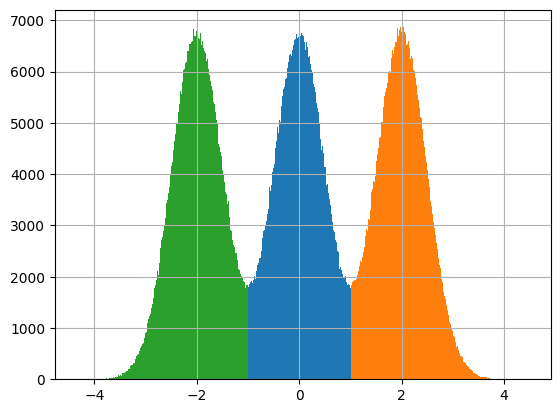

In [11]:
ctr_anterior=np.ones(k)*np.inf
eps=1e-6
while(np.abs(ctr-ctr_anterior).sum()>eps): # Minkowski con p=1
    dif=[]
    for c_i in ctr:
        dif.append(np.abs(c_i-df[['x']].values))
    distancias=np.concatenate(dif,axis=1)
    grupos=np.argmin(distancias,axis=1)
    df_copia=df.copy()
    df_copia['kmeans']=grupos
    ctr_anterior=ctr.copy()
    ctr=df_copia.groupby('kmeans')['x'].mean().values
df['kmeans']=grupos
df.groupby('kmeans')['x'].hist(bins='auto')
ctr

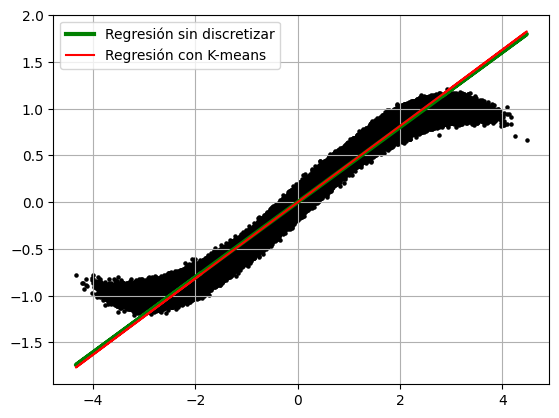

In [13]:
#@title Regresiones
#
# Modelo con datos sin discretizar
lin_SD=LinearRegression()
lin_SD.fit(df[['x']],df['y'])
predict_SD=lin_SD.predict(df[['x']])

# Modelo con datos discretizados con K-means
lin_kmeans=LinearRegression()
x=ctr.reshape(-1,1)
y=df.groupby('kmeans')['y'].mean()
lin_kmeans.fit(x,y)
predict_kmeans=lin_kmeans.predict(df[['x']].values)

# Gráfica
plt.scatter(df.x,df.y,s=5,c='k')
plt.plot(df.x,predict_SD,'g',label='Regresión sin discretizar',lw=3)
plt.plot(df.x,predict_kmeans,'r',label='Regresión con K-means')
plt.legend()
plt.grid()

In [14]:
# Modelo con datos sin discretizar
lin_SD.coef_,lin_SD.intercept_

(array([0.40165508]), 0.00018648608619573878)

In [15]:
# Modelo con datos discretizados usando K-means
lin_kmeans.coef_,lin_kmeans.intercept_

(array([0.40786998]), 0.00018521836404346786)

In [17]:
lin_SD.score(df[['x']],df['y']),lin_kmeans.score(df[['x']].values,df['y'])

(0.9846959828987776, 0.9844602258933561)

### Modelos resultantes
Modelo con datos sin discretizar
$$
y=0.4017x+0.000186
$$
Modelo con datos discretizados usando K-means
$$
y=0.4079x+0.000185
$$

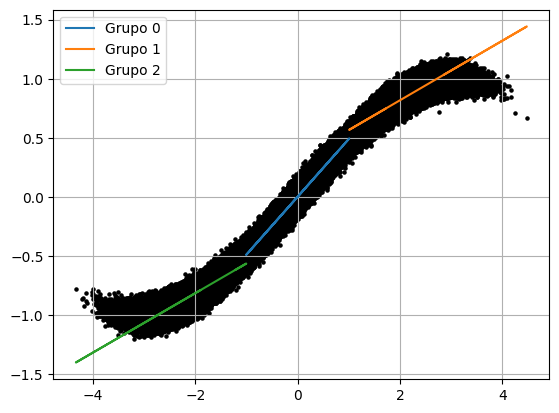

In [21]:
plt.scatter(df.x,df.y,c='k',s=5)
lin_centroides=[]
for c_i in range(k):
    x=df[df['kmeans']==c_i][['x']]
    y=df[df['kmeans']==c_i]['y']
    lin_centroides.append(LinearRegression())
    lin_centroides[-1].fit(x,y)

    plt.plot(x,lin_centroides[-1].predict(x),label='Grupo '+str(c_i))
plt.legend()
plt.grid()